In [3]:
#Modules to install via pip pandas,ipynb
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import json
from pprint import pprint
import os
import import_ipynb
import sys
sys.path.append('../')
from functions import *
from pandas.plotting import scatter_matrix

Using function to import datas

In [4]:
dataList=coojaJsonImporter("./traces")
data=[]
for nodeList in dataList:
    data.append(createNodes(nodeList))
testBH=dataList[0]

colors = ['dodgerblue', 'orange', 'green']
cases=['Black Hole 1']
nodeListBH=createNodes(testBH)

numberOfPackets=np.zeros(shape=(len(data),len(data[0])))
numberOfPacketsT=numberOfPackets.transpose()
dataNorm=dict2df(testBH)

nodeListBH[0].pkts[1:5]

data[0][0].pkts[1:5] 


Importing test_1BH_16nodes2018-11-09_19_46_22.json


,pkt,rtt,ttl
1,1.0,9600.0,61.0
2,2.0,4750.0,61.0
3,3.0,6491.0,61.0
4,4.0,6988.0,61.0


Plotting Round trip time in graphs (1 every hop), in every graph there are the nodes as the topology in the case of a Black Hole Attack

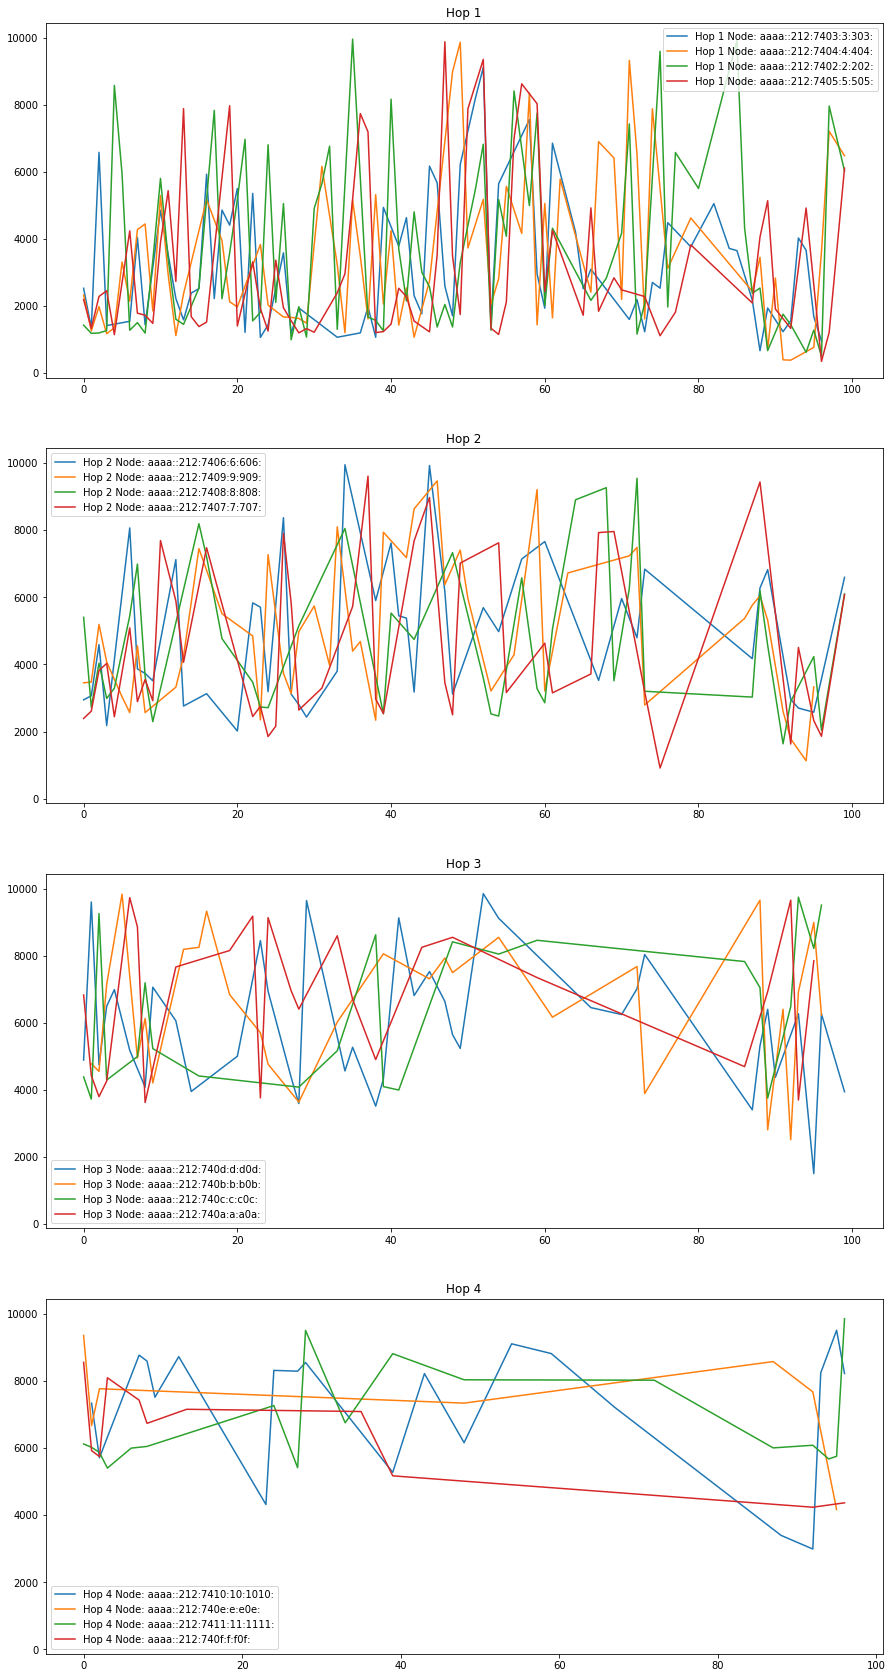

In [5]:

fig, axs= plt.subplots(4,1, figsize=(15,30),sharey=True)
#print(len(nodeListBH))
for node in nodeListBH:
    a=node.hop
    #print(node.hop)
    axs[a-1].plot(node.pkts["pkt"],node.pkts["rtt"], label="Hop "+str(a)+" Node: "+node.ip)
    axs[a-1].set_title("Hop "+str(a))


for ax in axs:
    
    ax.legend()

plt.show()


We print in 9 different Graph the packets RTT in Normal case, Black Hole 1 case and Black Hole 2 case

In [ ]:
#It will be necessary when adding more Cases
fig, axs= plt.subplots(len(data[0]),1, figsize=(15,90),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        axs[j].plot(data[i][j].pkts["pkt"],data[i][j].pkts["rtt"],label="Case " +str(1)   )
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Packet Number")
        axs[j].set_ylabel("Time (ms)")
        axs[j].legend()

plt.show()

Get an idea of how many the packets in every node are sent, divided by network.

-Blue=  Black Hole 1 


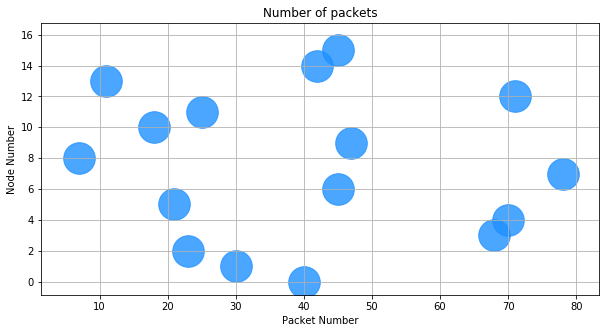

In [7]:

for i in range(len(data)):
    
    for j in range(len(data[i])):
        numberOfPackets[i][j]=len(data[i][j].pkts)

fig, axs = plt.subplots(1,figsize=(10,5))
for i in range(len(data)):
    for j in range(len(data[i])):
        axs.scatter(len(data[i][j].pkts),j,1000,
                    label="Node "+ str(j) ,
                    color=colors[i],
                   alpha=0.8)
        axs.set_title("Number of packets")
        axs.set_xlabel("Packet Number")
        axs.set_ylabel("Node Number")
        axs.grid(True)

Packet division


-Blue=  Black Hole 1


We can see that in the case of normal network we have 100 packets
When in the case of a Black Hole attack we have less packets even 0

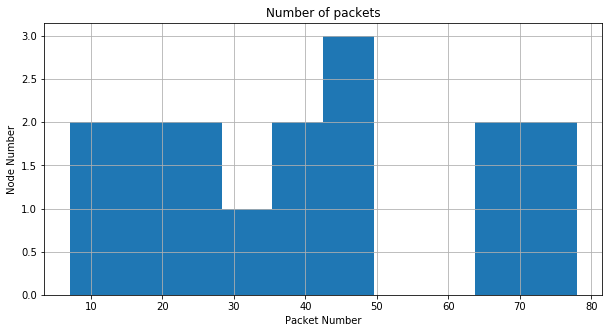

In [8]:
fig, axs = plt.subplots(1,figsize=(10,5))
axs.hist(numberOfPackets.transpose(),
                 #print(numberOfPackets)  ,
                 
                 #color=colors,
                 
                 orientation='vertical',
                 histtype='bar',
                
        )
axs.set_title("Number of packets")
axs.set_xlabel("Packet Number")
axs.set_ylabel("Node Number")
axs.grid(True)
#axs.legend()

Kernel density estimation by node in every case



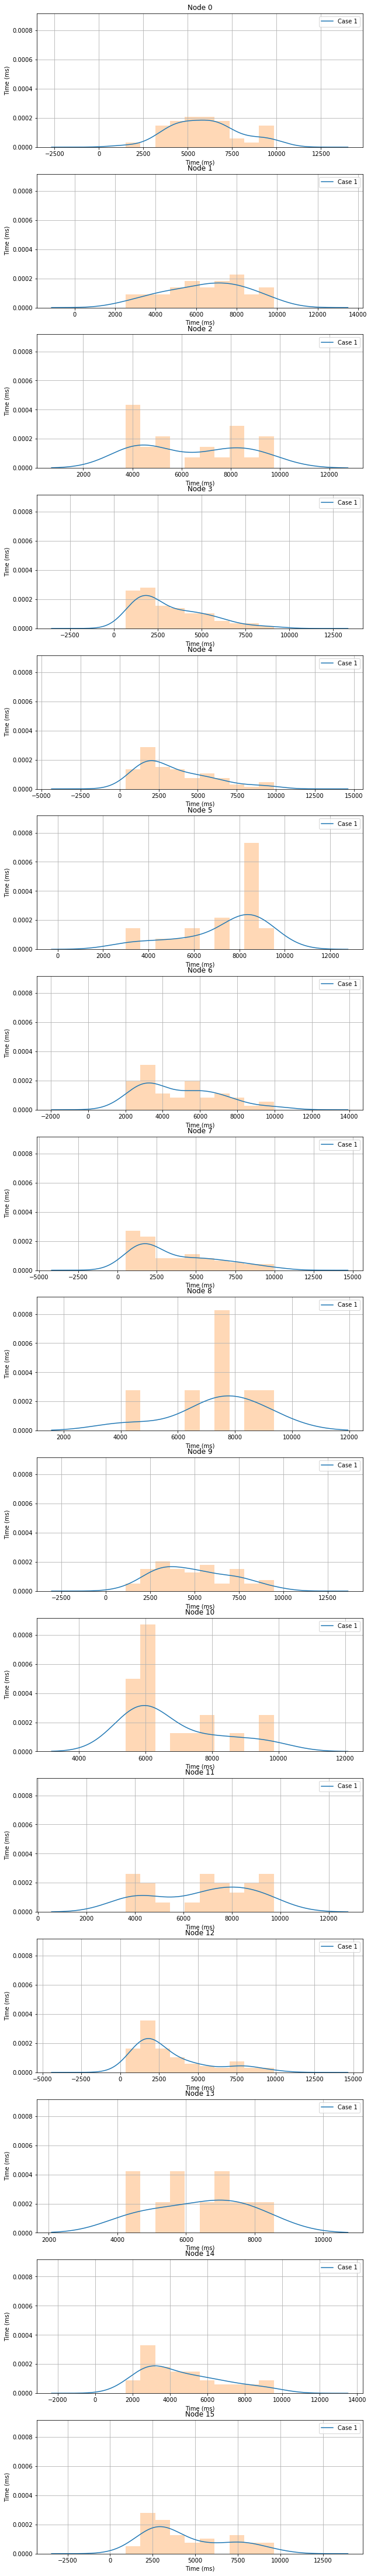

In [11]:
fig, axs= plt.subplots(len(data[0]),1, figsize=(10,80),sharey=True, )
for i in range(len(data)):
    for j in range(len(data[i])):
        data[i][j].pkts["rtt"].plot.kde(
            ax=axs[j],
            label="Case " +str(1),
            
        )
        axs[j].set_ylabel("Time (ms)")
        data[i][j].pkts["rtt"].hist(density=True,alpha=0.3, ax=axs[j])
        axs[j].set_title("Node "+ str(j))
        axs[j].set_xlabel("Time (ms)")
        axs[j].legend()
    

Data Preparation for Plot

In [8]:
hoplist=[]
df_a = pd.DataFrame( columns = ['pkt'])
dataHop=[]

listoflists = []
for i in range(len(data)):
    sublist = []
    for j in range(4):
        sublist.append((df_a))
    dataHop.append(sublist)
#print (listoflists)

for i in range(len(data)):
    col=[]
    for j in range(len(data[i])):
        hop=data[i][j].hop-1
        
        dataHop[i][hop]= pd.concat([dataHop[i][hop],data[i][j].pkts],sort=True)
        



Distribution of the delay in correlation with the Hops

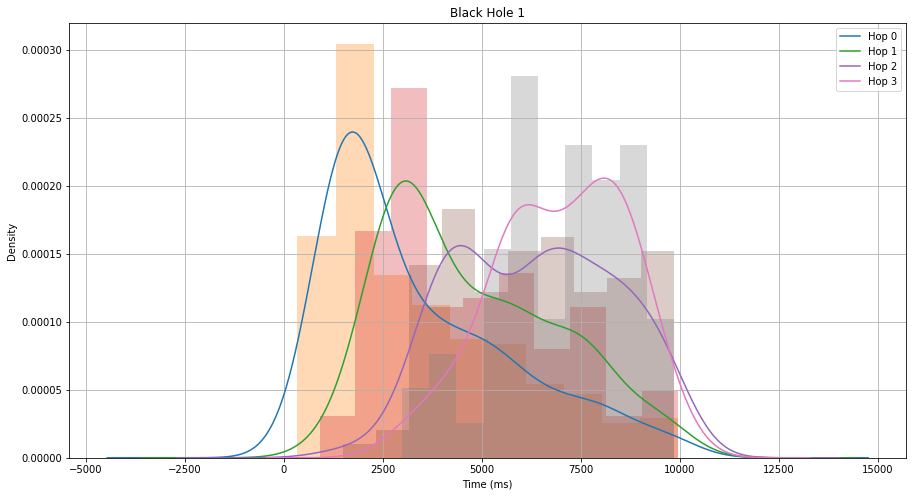

In [11]:
dataHopT=[*zip(*dataHop)]

fig, axs= plt.subplots(1, figsize=(15,8),sharey=True, )
for i in range(len(dataHopT)):
    for j in range(len(dataHopT[i])):
        
        dataHopT[i][j]['rtt'].plot.kde(
            ax=axs,
            label="Hop "+str(i),
        ) 
    
        dataHopT[i][j]["rtt"].hist(density=True,alpha=0.3, ax=axs)
        axs.set_title(""+ cases[j])
        axs.set_xlabel("Time (ms)")
        axs.legend()
       
        #axs.set_xlim([-40, 6000])

Distibution of the delay divided by Hop

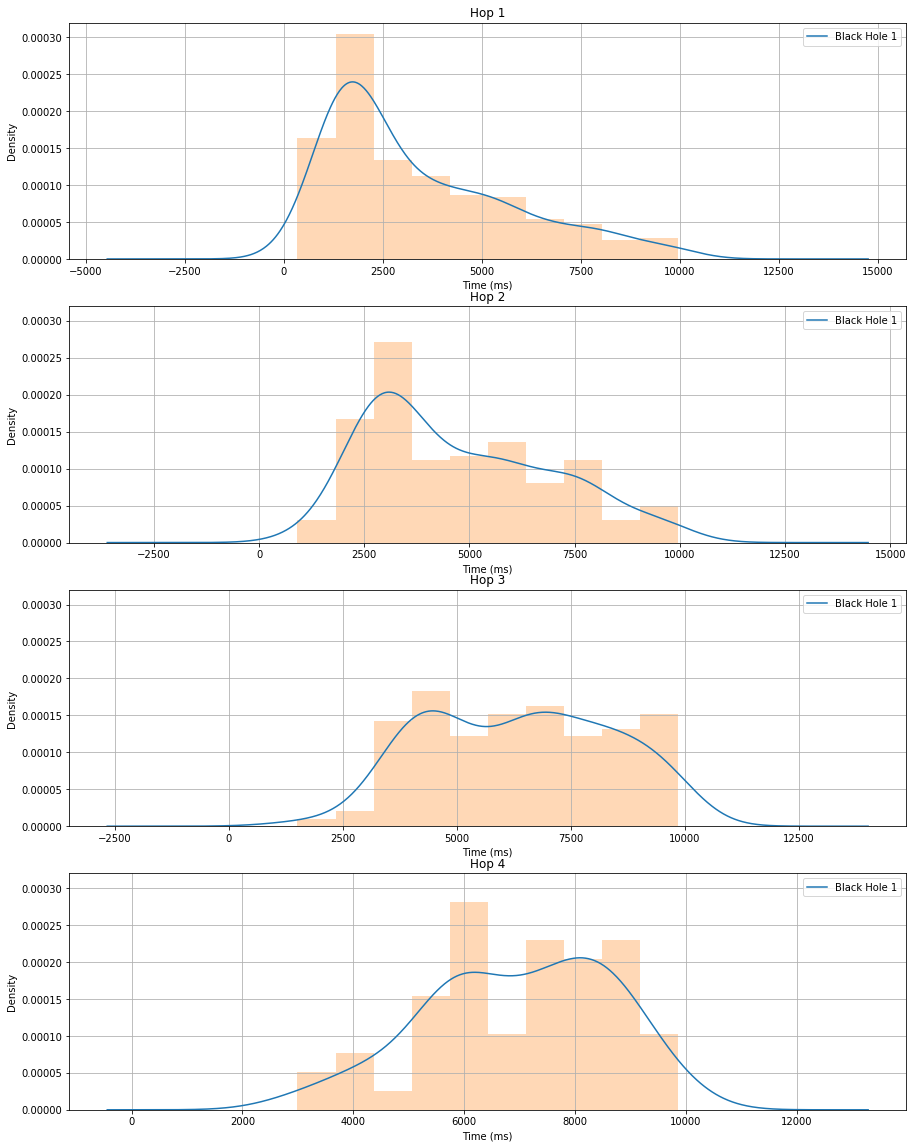

In [12]:
fig, axs= plt.subplots(4,1, figsize=(15,20),sharey=True, )
for i in range(len(dataHop)):
    for j in range(len(dataHop[i])):
        dataHop[i][j]['rtt'].plot.kde(
            ax=axs[j],
            label=cases[i],
        ) 
        
        dataHop[i][j]["rtt"].hist(density=True,alpha=0.3, ax=axs[j])
      
        axs[j].set_xlabel("Time (ms)")
        axs[j].set_title("Hop "+ str(j+1))
        axs[j].legend()
       
        #axs[j].set_xlim([-40, 6000])

Preparing Data for Machine Learning Analysis

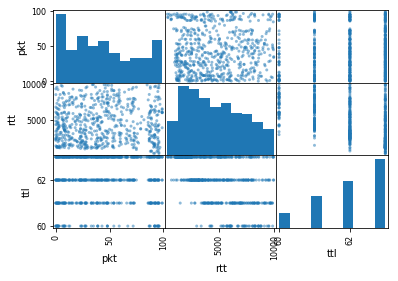

In [10]:
scatter_matrix(dataNorm)
plt.show()